In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# EDA

In [37]:
data=pd.read_csv("Ship_Performance_Dataset.csv")
data.head(5)

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


In [38]:
data=data.drop(["Date"],axis=1)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ship_Type                2600 non-null   object 
 1   Route_Type               2600 non-null   object 
 2   Engine_Type              2600 non-null   object 
 3   Maintenance_Status       2600 non-null   object 
 4   Speed_Over_Ground_knots  2736 non-null   float64
 5   Engine_Power_kW          2736 non-null   float64
 6   Distance_Traveled_nm     2736 non-null   float64
 7   Draft_meters             2736 non-null   float64
 8   Weather_Condition        2600 non-null   object 
 9   Cargo_Weight_tons        2736 non-null   float64
 10  Operational_Cost_USD     2736 non-null   float64
 11  Revenue_per_Voyage_USD   2736 non-null   float64
 12  Turnaround_Time_hours    2736 non-null   float64
 13  Efficiency_nm_per_kWh    2736 non-null   float64
 14  Seasonal_Impact_Score   

In [40]:
data.describe()

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,17.602863,1757.610939,1036.406203,9.929103,1032.573264,255143.344488,521362.062011,41.747536,0.798656,1.003816,4.914839,75.219222
std,4.311979,717.002777,568.632080,2.876423,558.697499,140890.482189,271211.625499,17.633130,0.403590,0.288251,2.597647,14.510168
min,10.009756,501.025220,50.433150,5.001947,50.229624,10092.306318,50351.814447,12.019909,0.100211,0.500004,1.000000,50.012005
25%,13.928452,1148.104914,548.511573,7.437485,553.983629,131293.378767,290346.388017,26.173537,0.463592,0.758033,3.000000,62.703724
50%,17.713757,1757.494344,1037.816060,9.918965,1043.207497,257157.653226,520176.931762,41.585188,0.789877,1.009009,5.000000,75.504709
75%,21.284785,2382.594292,1540.934161,12.413149,1527.722391,381796.930499,750072.791216,57.363922,1.147426,1.252808,7.000000,87.721205
max,24.997043,2998.734329,1998.337057,14.992947,1999.126697,499734.867868,999916.696140,71.972415,1.499259,1.499224,9.000000,99.999643


In [41]:
data.isnull().sum()

Ship_Type                  136
Route_Type                 136
Engine_Type                136
Maintenance_Status         136
Speed_Over_Ground_knots      0
Engine_Power_kW              0
Distance_Traveled_nm         0
Draft_meters                 0
Weather_Condition          136
Cargo_Weight_tons            0
Operational_Cost_USD         0
Revenue_per_Voyage_USD       0
Turnaround_Time_hours        0
Efficiency_nm_per_kWh        0
Seasonal_Impact_Score        0
Weekly_Voyage_Count          0
Average_Load_Percentage      0
dtype: int64

# Handling Missing Values

In [42]:
data.ffill(inplace=True)
data.bfill(inplace=True)

In [43]:
data.isnull().sum()

Ship_Type                  0
Route_Type                 0
Engine_Type                0
Maintenance_Status         0
Speed_Over_Ground_knots    0
Engine_Power_kW            0
Distance_Traveled_nm       0
Draft_meters               0
Weather_Condition          0
Cargo_Weight_tons          0
Operational_Cost_USD       0
Revenue_per_Voyage_USD     0
Turnaround_Time_hours      0
Efficiency_nm_per_kWh      0
Seasonal_Impact_Score      0
Weekly_Voyage_Count        0
Average_Load_Percentage    0
dtype: int64

# Feature Engineering

In [45]:
le=LabelEncoder()
data["Ship_Type"]=le.fit_transform(data["Ship_Type"])
data["Route_Type"]=le.fit_transform(data["Route_Type"])
data["Engine_Type"]=le.fit_transform(data["Engine_Type"])
data["Maintenance_Status"]=le.fit_transform(data["Maintenance_Status"])
data["Weather_Condition"]=le.fit_transform(data["Weather_Condition"])

In [47]:
ss=StandardScaler()
data_scaled=ss.fit_transform(data)

# PCA Model

In [48]:
inertia=[]
for k in range (1 , 11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

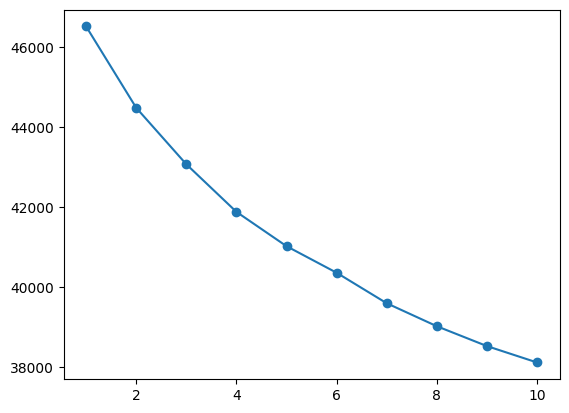

In [49]:
plt.plot(range(1,11),inertia,marker="o")
plt.show()

Mean distance from points to their cluster centers:
Cluster
0    4.015622
1    4.000812
Name: Distance_to_center, dtype: float64
Overall mean distance: 4.00844423456138


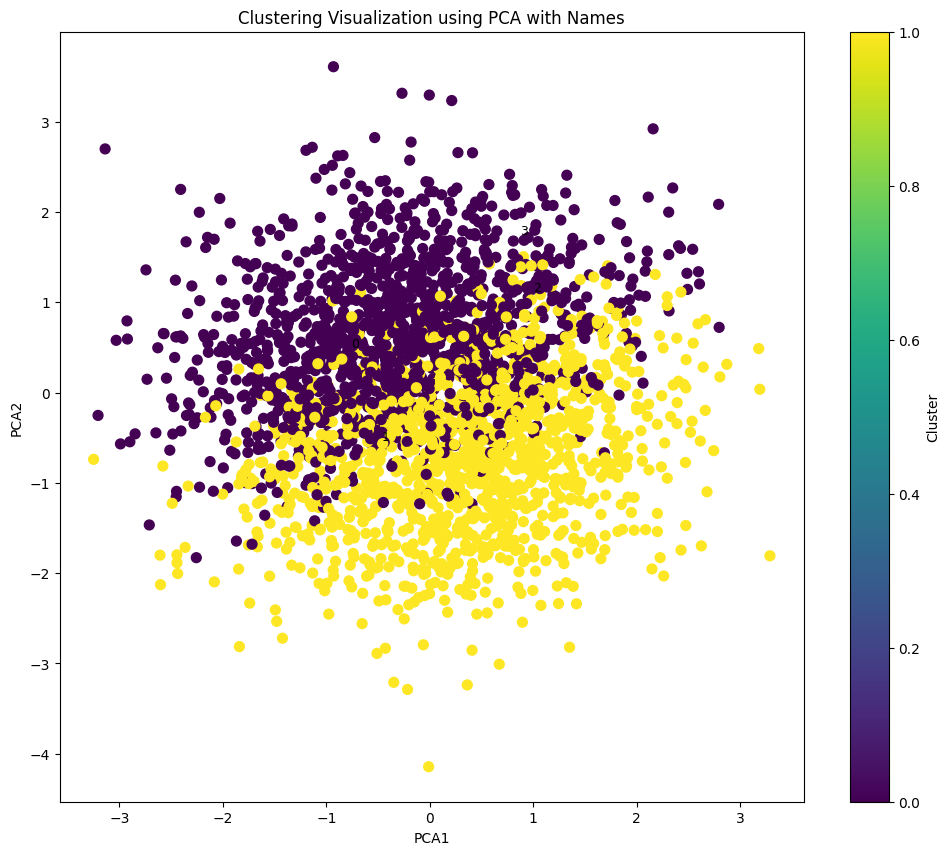

In [65]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)
data['Cluster'] = kmeans.labels_

distances = pairwise_distances(data_scaled, kmeans.cluster_centers_)
data['Distance_to_center'] = distances[np.arange(len(distances)), data['Cluster']]

mean_distances = data.groupby('Cluster')['Distance_to_center'].mean()
print("Mean distance from points to their cluster centers:")
print(mean_distances)

# 4. Overall mean distance
overall_mean_distance = data['Distance_to_center'].mean()
print(f"Overall mean distance: {overall_mean_distance}")

pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)
data_pca = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])

data_pca['Cluster'] = data['Cluster']
data_pca['Ship_Type'] = data['Ship_Type']

plt.figure(figsize=(12, 10))
plt.scatter(data_pca['PCA1'], data_pca['PCA2'], c=data_pca['Cluster'], cmap='viridis', marker='o', s=50)

annotated_genotypes = set()
for i, genotype in enumerate(data_pca['Ship_Type']):
    if genotype not in annotated_genotypes:
        plt.text(data_pca['PCA1'].iloc[i], data_pca['PCA2'].iloc[i], genotype,
                 fontsize=9, ha='right', va='bottom', color='black')
        annotated_genotypes.add(genotype)

plt.colorbar(label='Cluster')
plt.title('Clustering Visualization using PCA with Names')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

data1 = data.copy()

linked = linkage(data_scaled, method='ward')

cluster_labels = fcluster(linked, 2, criterion='maxclust')
data1['Cluster'] = cluster_labels

data_reset = data.reset_index(drop=True)
data1_reset = data1.reset_index(drop=True)

genotype_to_cluster = {i: data_reset['Ship_Type'].iloc[i] for i in range(len(data1_reset))}

custom_labels = [f"{genotype_to_cluster[i]} - Cluster {cluster_labels[i]}" for i in range(len(data1_reset))]
